### DEEP AUTOENCODER

In [2]:
#IMPORTING LIBRARIES
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist

In [9]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

In [3]:
#LOADING IN THE MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [7]:
#USING THE FUNCTIONAL API TO DEFINE A NEURAL NETWORK
input_size = 784
hidden_size = 128
code_size = 32

#DEFINE THE NETWORK
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

#COMPILE THE NETWORK
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

#FIT THE NETWORK
autoencoder.fit(x_train, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1358 - accuracy: 0.0101
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0987 - accuracy: 0.0116
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0933 - accuracy: 0.0119


In [8]:
#FIND MODEL SCORE. HERE THE SCORE IS VERY LOW COZ I GAVE THE WRONG METRICS IN MODEL.COMPILE()
loss, acc = autoencoder.evaluate(x_train, x_train, verbose=1)
print('Test Accuracy: %.3f' % acc)
print('Test Loss: ', loss)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.0133
Test Accuracy: 0.013
Test Loss:  0.09102261811494827


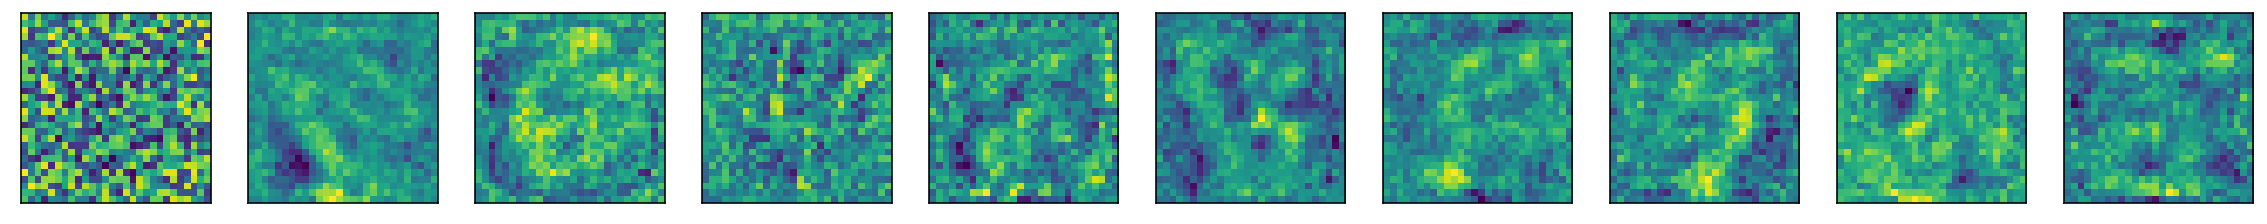

In [10]:
#DISPLAY WEIGHT IMAGES
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

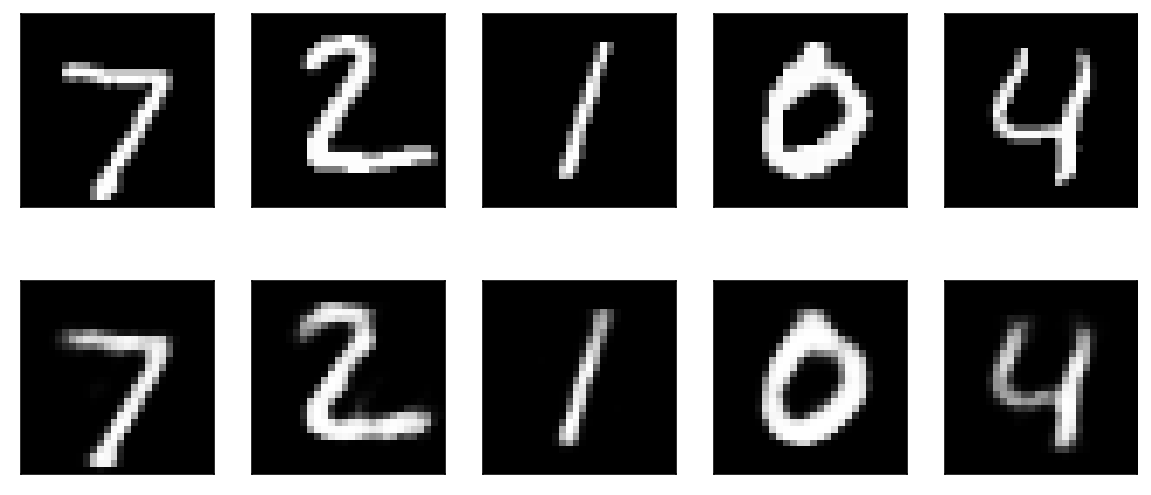

In [11]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

### DENOISING AUTOENCODER

In [12]:
#GENERATE NOISY DATA
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [13]:
#USE THE FUNCTIONAL API TO DEFINE THE NEURAL NET
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1626
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1255
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1189
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1158
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1138
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1125
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1114
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1105
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1098
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1091


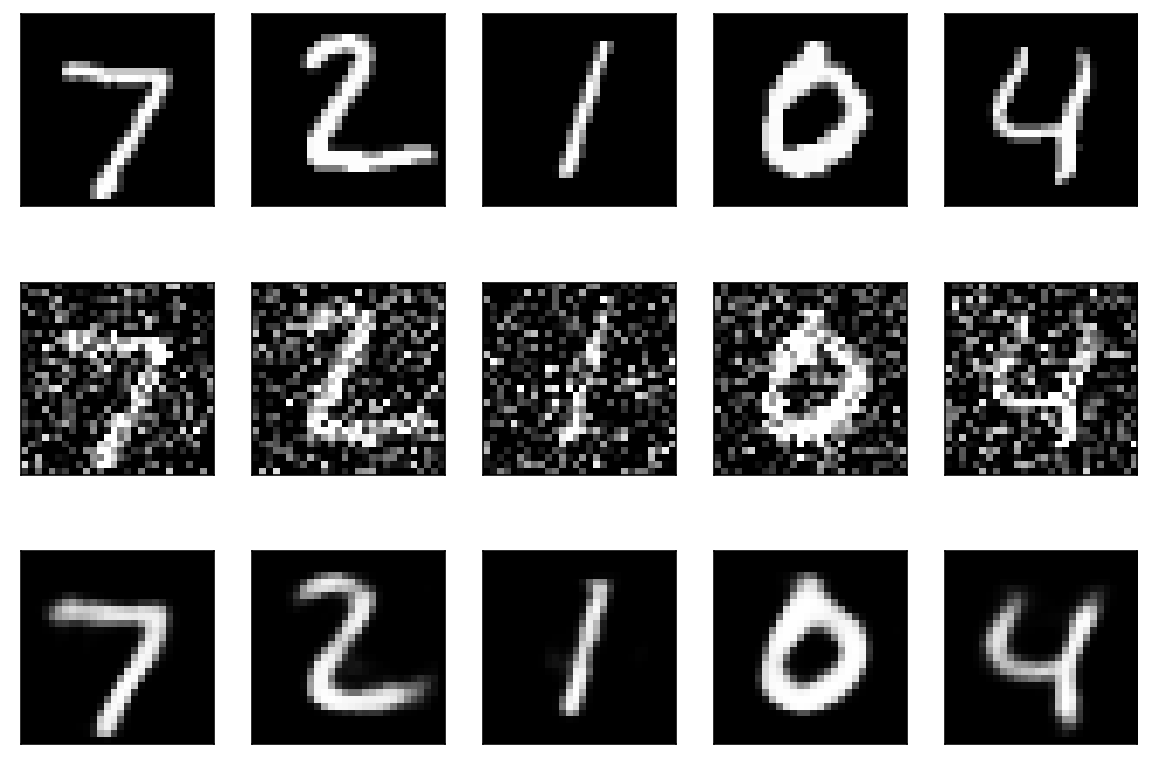

In [14]:
#DISPLAY RESULTS
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')